   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

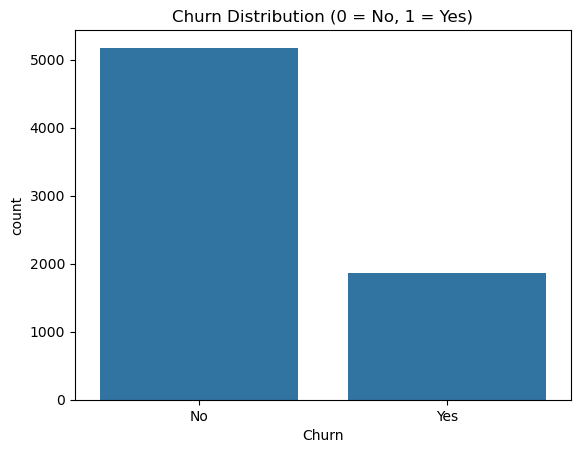

In [1]:
#Step 1: Problem Definition
#Goal: Predict customer churn (Yes/No) based on usage patterns and demographics

#Step 2: Load and Explore Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head())

# Check missing values
print(df.isnull().sum())

# Visualize churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution (0 = No, 1 = Yes)')
plt.show()

In [2]:
#Key Insights Produced:
#Preview of Data: Understand what kinds of variables are available (e.g., demographic, service use, financial).

#Missing Data Identification: Helps plan preprocessing steps.

#Churn Distribution:

#Confirms whether churn is a minority class.

#Suggests that retaining customers may be a significant issue for the business.

#Points to a need for predictive modeling to identify churn risks early.

In [8]:
#Step 3: Data Cleaning
import pandas as pd

#Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

#Drop irrelevant columns (e.g., customer ID)
df.drop('customerID', axis=1, inplace=True)

# Convert 'TotalCharges' to numeric (handling empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Convert binary categoricals to 0/1
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [7]:
#Summary of Key Insights:

#Drop customerID - Remove non-predictive column and Keeps data focused on useful features

#Convert TotalCharges - Ensure numeric data type and Prevents processing errors and ensures consistency

#Fill missing values - Handle NaNs and Median imputation maintains robustness

#Binary encoding - Model-ready features and Converts human-readable labels to numeric

In [9]:
#Step 4: Feature Engineering

# One-hot encode categorical variables (e.g., 'InternetService')
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'])

# Create interaction feature (e.g., tenure * monthly charges)
df['TenureCharges'] = df['tenure'] * df['MonthlyCharges']

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [10]:
#Summary of Key Insights

#One-hot encoding [pd.get_dummies()] - Convert categories to numeric and Enables models to interpret non-numeric features

#Feature interaction	[tenure * MonthlyCharges] - Add meaningful combined features and Highlights high-value customers

#Feature scaling [StandardScaler()]	- Normalize numeric columns and	Prevents features with large scales from dominating models

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Load your dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Drop non-predictive columns
df = df.drop(columns=['customerID'])

# Convert target to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Define features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Churn)
    
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.2f}\n")

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1539
           1       0.69      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113

AUC-ROC: 0.86

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.67      0.46      0.54       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113

AUC-ROC: 0.83



In [1]:
# Summary of Key Insights

#Drop customerID [drop()] - Remove non-predictive feature and Cleaner data improves model performance

#Binary encoding [map()] - Convert target to numeric	and Enables classification

#One-hot encoding [get_dummies()] - Handle categorical features	and Avoids false ordinal assumptions

#Train-test split [train_test_split()] - Prepare for unbiased evaluation and Prevents data leakage

#Model fitting [fit(), predict()] - Train and test models and Enables performance comparison

#Evaluation	[classification_report, roc_auc_score] - Assess model accuracy and ranking and Helps select the best model objectively

In [6]:
#Step 5 - Model Building
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Drop irrelevant columns
df = df.drop('customerID', axis=1)

# Convert target column to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convert TotalCharges to numeric and fix missing values (no chained assignment)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Split data
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features (fix convergence warning)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),  # More iterations for convergence
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred):.2f}\n")


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1539
           1       0.69      0.58      0.63       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113

AUC-ROC: 0.74

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1539
           1       0.68      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113

AUC-ROC: 0.69



In [7]:
#Summary of Key Insights

#Data Cleaning is Critical - Handling missing values and encoding categorical data ensures that models receive clean numeric input.

#Feature Scaling Improves Convergence - Logistic regression benefits significantly from scaling, as unscaled data can cause it to fail to converge.

#Model Comparison - You can easily compare different models using the same code pattern — great for benchmarking.

#Evaluation Metrics Matter - Accuracy isn't enough for imbalanced datasets like churn prediction. AUC-ROC and classification reports help assess 
#real-world performance.

#Note: AUC-ROC means Area Under the Curve - Receiver Operating Characteristic

#A value of 0.69 means:

#There is a 69% chance that the model ranks a randomly chosen positive instance (e.g. churned customer) higher than a randomly chosen negative one 
#(non-churned).

In [8]:
#Step 6 - Hyperameter Tuning 

from sklearn.model_selection import GridSearchCV

# Tune Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [9]:
#Summary of Key Insights:

#Hyperparameter Tuning: This approach is critical for optimizing machine learning models. Instead of using arbitrary values for model hyperparameters 
#(like the number of trees in the forest), you're systematically searching for the combination that gives the best performance.

#Cross-Validation: The use of 5-fold cross-validation ensures that the evaluation of each hyperparameter combination is more robust and less prone to 
#overfitting. It helps to assess how well the model generalizes to unseen data.

#Best Hyperparameters: The code helps identify the optimal hyperparameters for the Random Forest model, which could potentially improve its performance 
#on unseen test data.

#Efficient Grid Search: By using GridSearchCV, you save time compared to manually tuning each hyperparameter combination. The function also offers 
#parallelization options (e.g., using n_jobs=-1), which can make the search faster on large datasets.

In [10]:
#Step 7 - Deployment
# Save the best model
import joblib
joblib.dump(grid.best_estimator_, 'churn_model.pkl')

# Streamlit app (app.py)
import streamlit as st
import joblib

model = joblib.load('churn_model.pkl')
st.title('Customer Churn Predictor')

# Input widgets
tenure = st.slider('Tenure (months)', 0, 100, 12)
monthly_charges = st.number_input('Monthly Charges ($)', 0.0, 200.0, 70.0)
contract = st.selectbox('Contract', ['Month-to-month', 'One year', 'Two year'])

if st.button('Predict Churn'):
    contract_encoded = f"Contract_{contract.replace(' ', '')}"
    features = pd.DataFrame({
        'tenure': [tenure],
        'MonthlyCharges': [monthly_charges],
        **{f"Contract_{k}": 0 for k in ['Month-to-month', 'Oneyear', 'Twoyear']},
        **{contract_encoded: 1}
    })
    prediction = model.predict(features)[0]
    st.success(f"Prediction: {'Churn' if prediction == 1 else 'No Churn'}")

2025-05-06 17:14:58.367 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 17:14:58.594 
  command:

    streamlit run C:\Users\tdala\anaconda3\envs\streamlitforhouseproject\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-06 17:14:58.594 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 17:14:58.594 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 17:14:58.594 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 17:14:58.597 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 17:14:58.598 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 17:14: